# Spotify
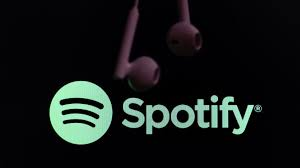

Spotify is one of the popular platforms where you can listen your favourite songs , podcasts and playlists . Being a spotify lover myself, today i am gonna do some analysis on its songs :) Hope ya all like it :)

# Whats New ??

### Have a look at the updated file where we have now standardized the data causing the euclidean distance to give the same results as Cosine Similarity :) But is that it .... 

### No .... We have seen some interesting findings in the way how the results were produced for example the ranking of the songs  :)

### Hope you like it :) Give it a scroll :)

# Importing Packages

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [41]:
data=pd.read_csv('../input/dataset-of-songs-in-spotify/genres_v2.csv')

# Having First Look At The Data

### The full list of genres included in the CSV are Trap, Techno, Techhouse, Trance, Psytrance, Dark Trap, DnB (drums and bass), Hardstyle, Underground Rap, Trap Metal, Emo, Rap, RnB, Pop and Hiphop.

In [42]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


# Let's look closer at data with pair plot :)

In [43]:
cols=list(data.columns[11:])
del cols[7]


In [44]:
df=copy.deepcopy(data)
df.drop(columns=cols,inplace=True)

In [45]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

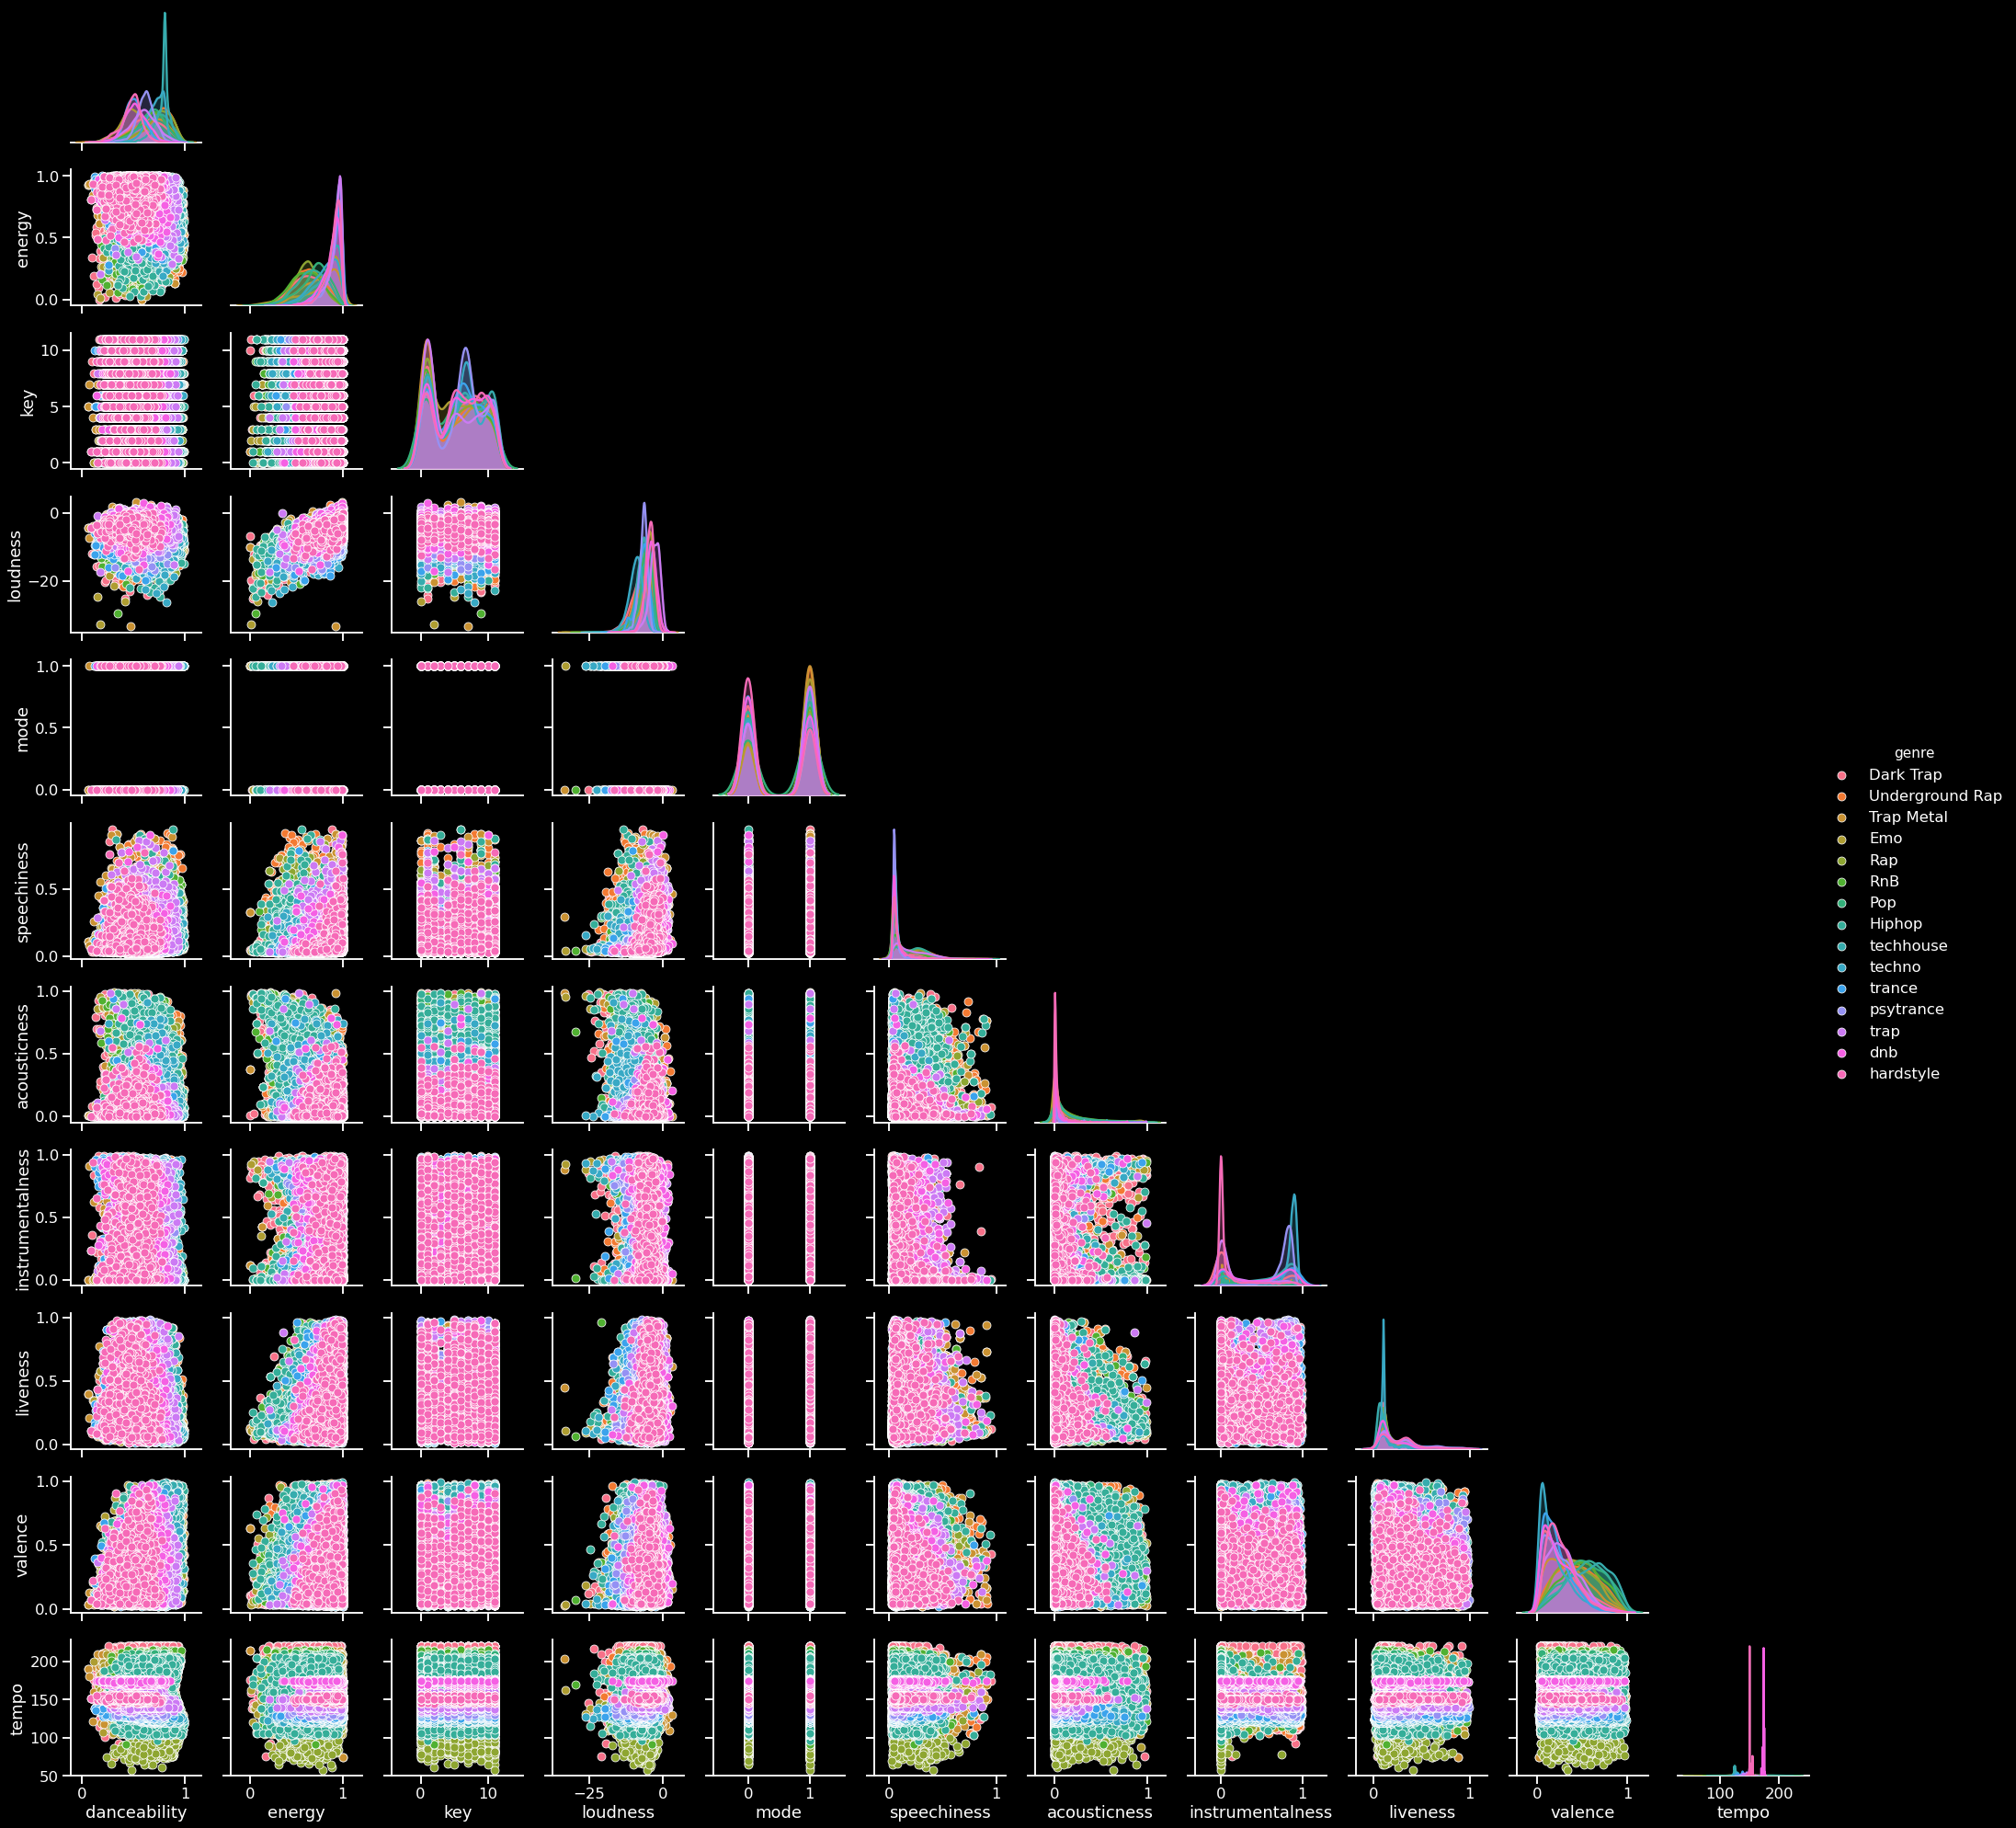

In [33]:
sns.pairplot(df,corner=True,hue='genre')

# Let's have a look at the average time of a song 

In [46]:
px.box(data_frame=data,y='duration_ms',color='genre')

Well we can clearly see that most of the genres have their own time ranges pystrance is mostly longer and we can see that trap music is of lower timespan

# HeatMap of the data

In [47]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [48]:
x=list(data.corr().columns)
y=list(data.corr().index)
values=np.array(data.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

# Let's Make A Recommendation System....

Over here we are gonna different methods to find the closest songs to the one that you have liked :)

# Let's remove all the rows with no song name

In [49]:
data=data.dropna(subset=['song_name'])

# Need to Preprocess the Data 

## Question arises why do we need to standardize the data ??

### Answer : You see that the data has columns like duration ms whose distance difference can be high causing lot of change in the answer we want every field to contribute the same to the distance (euclidean) hence we have to standardize the data .

In [51]:
# Creating a new dataframe with required features
df=data[data.columns[:11]]
df['genre']=data['genre']
df['time_signature']=data['time_signature']
df['duration_ms']=data['duration_ms']
df['song_name']=data['song_name']

In [54]:
x=df[df.drop(columns=['song_name','genre']).columns].values
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
df[df.drop(columns=['song_name','genre']).columns]=X_scaled

# Recommendation System Using Euclidean Distance

In [56]:
# This is a function to find the closest song name from the list
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]
        

In [57]:
# Making a weight matrix using euclidean distance
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    
    
    
    
    
    
    
            

In [67]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(df,a,b)

Please enter The name of the song :Perfect
Please enter the number of recommendations you want: 4
The song closest to your search is : Perfect
WhatWasThat
Numb
Buss It
drugz


# Recommendation System Using Cosine Similarity Distance

In [68]:
def make_matrix_cosine(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    
    

In [69]:
c=input('Please enter The name of the song :')
d=int(input('Please enter the number of recommendations you want: '))
make_matrix_cosine(df,c,d)

Please enter The name of the song :Perfect
Please enter the number of recommendations you want: 4
The song closest to your search is : Perfect
WhatWasThat
drugz
Numb
Buss It


# Making a recommendation System using Correlation Distance

In [70]:
def make_matrix_correlation(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    
    

In [71]:
e=input('Please enter The name of the song :')
f=int(input('Please enter the number of recommendations you want: '))
make_matrix_correlation(df,e,f)

Please enter The name of the song :Perfect
Please enter the number of recommendations you want: 4
The song closest to your search is : Perfect
WhatWasThat
drugz
Buss It
Numb


# Hope you try it first :) 

# Give a comment which recommendations you liked :)

# Hope you liked the recommended songs :) 

# Just a simple method to make a recommendation system :)

# Thank you :)
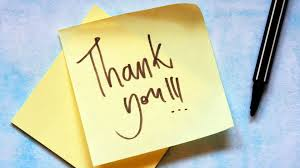